In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

In [3]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [4]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.117 - 0.116


/Users/chanshinpark/workspace/deepbottom/chapter6/../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/Users/chanshinpark/workspace/deepbottom/chapter6/../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/chanshinpark/workspace/deepbottom/chapter6/../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/chanshinpark/workspace/deepbottom/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/chanshinpark/workspace/deepbottom/chapter6/../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.097
epoch:2 | 0.097 - 0.107
epoch:3 | 0.097 - 0.121
epoch:4 | 0.097 - 0.137
epoch:5 | 0.097 - 0.161
epoch:6 | 0.097 - 0.179
epoch:7 | 0.097 - 0.195
epoch:8 | 0.097 - 0.214
epoch:9 | 0.097 - 0.228
epoch:10 | 0.097 - 0.24
epoch:11 | 0.097 - 0.267
epoch:12 | 0.097 - 0.289
epoch:13 | 0.097 - 0.304
epoch:14 | 0.097 - 0.315
epoch:15 | 0.097 - 0.328
epoch:16 | 0.097 - 0.337
epoch:17 | 0.097 - 0.356
epoch:18 | 0.097 - 0.376
epoch:19 | 0.097 - 0.39


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 2/16 ==============
epoch:0 | 0.099 - 0.107
epoch:1 | 0.097 - 0.092
epoch:2 | 0.097 - 0.134
epoch:3 | 0.097 - 0.163
epoch:4 | 0.097 - 0.193
epoch:5 | 0.097 - 0.217
epoch:6 | 0.097 - 0.247
epoch:7 | 0.097 - 0.274
epoch:8 | 0.097 - 0.287
epoch:9 | 0.097 - 0.305
epoch:10 | 0.097 - 0.319
epoch:11 | 0.097 - 0.345
epoch:12 | 0.097 - 0.374
epoch:13 | 0.097 - 0.398
epoch:14 | 0.097 - 0.414
epoch:15 | 0.097 - 0.421
epoch:16 | 0.097 - 0.432
epoch:17 | 0.097 - 0.446
epoch:18 | 0.097 - 0.455


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.48
============== 3/16 ==============
epoch:0 | 0.118 - 0.073
epoch:1 | 0.408 - 0.107
epoch:2 | 0.54 - 0.141
epoch:3 | 0.627 - 0.177
epoch:4 | 0.707 - 0.228
epoch:5 | 0.762 - 0.269
epoch:6 | 0.817 - 0.301
epoch:7 | 0.871 - 0.334
epoch:8 | 0.895 - 0.366
epoch:9 | 0.918 - 0.403
epoch:10 | 0.943 - 0.433
epoch:11 | 0.953 - 0.459
epoch:12 | 0.968 - 0.494
epoch:13 | 0.975 - 0.516
epoch:14 | 0.978 - 0.528
epoch:15 | 0.986 - 0.552
epoch:16 | 0.99 - 0.569
epoch:17 | 0.99 - 0.593
epoch:18 | 0.994 - 0.604
epoch:19 | 0.994 - 0.619


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 4/16 ==============
epoch:0 | 0.1 - 0.113
epoch:1 | 0.335 - 0.125
epoch:2 | 0.498 - 0.17
epoch:3 | 0.56 - 0.232
epoch:4 | 0.625 - 0.29
epoch:5 | 0.666 - 0.346
epoch:6 | 0.679 - 0.383
epoch:7 | 0.727 - 0.447
epoch:8 | 0.756 - 0.476
epoch:9 | 0.772 - 0.525
epoch:10 | 0.791 - 0.57
epoch:11 | 0.793 - 0.604
epoch:12 | 0.809 - 0.624
epoch:13 | 0.824 - 0.658
epoch:14 | 0.847 - 0.672
epoch:15 | 0.831 - 0.689
epoch:16 | 0.85 - 0.717
epoch:17 | 0.855 - 0.73


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.866 - 0.744
epoch:19 | 0.885 - 0.762
============== 5/16 ==============
epoch:0 | 0.068 - 0.068
epoch:1 | 0.077 - 0.115
epoch:2 | 0.082 - 0.249
epoch:3 | 0.087 - 0.397
epoch:4 | 0.102 - 0.528
epoch:5 | 0.118 - 0.597
epoch:6 | 0.137 - 0.652
epoch:7 | 0.154 - 0.688
epoch:8 | 0.176 - 0.718
epoch:9 | 0.186 - 0.739
epoch:10 | 0.206 - 0.764
epoch:11 | 0.231 - 0.789
epoch:12 | 0.257 - 0.806
epoch:13 | 0.264 - 0.815
epoch:14 | 0.283 - 0.829
epoch:15 | 0.29 - 0.841
epoch:16 | 0.303 - 0.847
epoch:17 | 0.313 - 0.861
epoch:18 | 0.327 - 0.872


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.336 - 0.876
============== 6/16 ==============
epoch:0 | 0.101 - 0.103
epoch:1 | 0.138 - 0.267
epoch:2 | 0.149 - 0.439
epoch:3 | 0.14 - 0.564
epoch:4 | 0.118 - 0.66
epoch:5 | 0.117 - 0.714
epoch:6 | 0.118 - 0.757
epoch:7 | 0.16 - 0.797
epoch:8 | 0.123 - 0.817
epoch:9 | 0.165 - 0.836
epoch:10 | 0.166 - 0.849
epoch:11 | 0.167 - 0.862
epoch:12 | 0.169 - 0.874
epoch:13 | 0.147 - 0.893
epoch:14 | 0.18 - 0.904
epoch:15 | 0.163 - 0.912
epoch:16 | 0.137 - 0.92
epoch:17 | 0.117 - 0.93
epoch:18 | 0.117 - 0.931
epoch:19 | 0.117 - 0.951


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 7/16 ==============
epoch:0 | 0.099 - 0.1
epoch:1 | 0.084 - 0.219
epoch:2 | 0.117 - 0.549
epoch:3 | 0.116 - 0.664
epoch:4 | 0.116 - 0.709
epoch:5 | 0.116 - 0.749
epoch:6 | 0.117 - 0.779
epoch:7 | 0.116 - 0.809
epoch:8 | 0.116 - 0.841
epoch:9 | 0.116 - 0.856
epoch:10 | 0.116 - 0.885
epoch:11 | 0.116 - 0.899
epoch:12 | 0.116 - 0.927
epoch:13 | 0.116 - 0.94
epoch:14 | 0.117 - 0.955
epoch:15 | 0.107 - 0.967
epoch:16 | 0.117 - 0.977
epoch:17 | 0.116 - 0.98
epoch:18 | 0.117 - 0.988


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.992
============== 8/16 ==============
epoch:0 | 0.116 - 0.094
epoch:1 | 0.117 - 0.382
epoch:2 | 0.097 - 0.617
epoch:3 | 0.117 - 0.758
epoch:4 | 0.117 - 0.849
epoch:5 | 0.117 - 0.891
epoch:6 | 0.117 - 0.926
epoch:7 | 0.117 - 0.941
epoch:8 | 0.117 - 0.964
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.105 - 0.144
epoch:1 | 0.116 - 0.494
epoch:2 | 0.116 - 0.722
epoch:3 | 0.116 - 0.81
epoch:4 | 0.117 - 0.866
epoch:5 | 0.117 - 0.908
epoch:6 | 0.117 - 0.933
epoch:7 | 0.117 - 0.953
epoch:8 | 0.117 - 0.963
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.991
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 10/16 ==============
epoch:0 | 0.117 - 0.125
epoch:1 | 0.117 - 0.575
epoch:2 | 0.117 - 0.747
epoch:3 | 0.117 - 0.827
epoch:4 | 0.117 - 0.926
epoch:5 | 0.117 - 0.929
epoch:6 | 0.117 - 0.975
epoch:7 | 0.117 - 0.967
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.976
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.117 - 0.112
epoch:1 | 0.117 - 0.565
epoch:2 | 0.117 - 0.705
epoch:3 | 0.117 - 0.753
epoch:4 | 0.117 - 0.866
epoch:5 | 0.117 - 0.917
epoch:6 | 0.117 - 0.914
epoch:7 | 0.117 - 0.93
epoch:8 | 0.117 - 0.959
epoch:9 | 0.117 - 0.936
epoch:10 | 0.117 - 0.965
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.99
epoch:18 | 0.117 - 0.994


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.994
============== 12/16 ==============
epoch:0 | 0.099 - 0.164
epoch:1 | 0.099 - 0.448
epoch:2 | 0.116 - 0.582
epoch:3 | 0.116 - 0.656
epoch:4 | 0.116 - 0.688
epoch:5 | 0.116 - 0.696
epoch:6 | 0.116 - 0.713
epoch:7 | 0.116 - 0.694
epoch:8 | 0.116 - 0.702
epoch:9 | 0.116 - 0.716
epoch:10 | 0.116 - 0.78
epoch:11 | 0.116 - 0.774
epoch:12 | 0.116 - 0.761
epoch:13 | 0.116 - 0.714
epoch:14 | 0.116 - 0.726
epoch:15 | 0.116 - 0.801
epoch:16 | 0.116 - 0.793
epoch:17 | 0.116 - 0.785
epoch:18 | 0.116 - 0.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.802
============== 13/16 ==============
epoch:0 | 0.093 - 0.165
epoch:1 | 0.116 - 0.391
epoch:2 | 0.116 - 0.56
epoch:3 | 0.116 - 0.591
epoch:4 | 0.116 - 0.594
epoch:5 | 0.116 - 0.6
epoch:6 | 0.116 - 0.669
epoch:7 | 0.116 - 0.674
epoch:8 | 0.116 - 0.632
epoch:9 | 0.116 - 0.683
epoch:10 | 0.116 - 0.698
epoch:11 | 0.116 - 0.694
epoch:12 | 0.116 - 0.709
epoch:13 | 0.116 - 0.708
epoch:14 | 0.116 - 0.7
epoch:15 | 0.116 - 0.709
epoch:16 | 0.116 - 0.71
epoch:17 | 0.116 - 0.711
epoch:18 | 0.116 - 0.714


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.685
============== 14/16 ==============
epoch:0 | 0.087 - 0.142
epoch:1 | 0.117 - 0.349
epoch:2 | 0.117 - 0.465
epoch:3 | 0.117 - 0.535
epoch:4 | 0.117 - 0.558
epoch:5 | 0.117 - 0.557
epoch:6 | 0.117 - 0.582
epoch:7 | 0.116 - 0.605
epoch:8 | 0.116 - 0.602
epoch:9 | 0.116 - 0.604
epoch:10 | 0.116 - 0.611
epoch:11 | 0.116 - 0.607
epoch:12 | 0.116 - 0.58
epoch:13 | 0.116 - 0.663
epoch:14 | 0.116 - 0.598
epoch:15 | 0.116 - 0.689
epoch:16 | 0.116 - 0.704
epoch:17 | 0.116 - 0.704
epoch:18 | 0.116 - 0.707


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.706
============== 15/16 ==============
epoch:0 | 0.105 - 0.146
epoch:1 | 0.117 - 0.178
epoch:2 | 0.116 - 0.32
epoch:3 | 0.116 - 0.39
epoch:4 | 0.116 - 0.406
epoch:5 | 0.117 - 0.406
epoch:6 | 0.117 - 0.406
epoch:7 | 0.117 - 0.422
epoch:8 | 0.117 - 0.418
epoch:9 | 0.117 - 0.415
epoch:10 | 0.117 - 0.414
epoch:11 | 0.117 - 0.424
epoch:12 | 0.117 - 0.43
epoch:13 | 0.117 - 0.428
epoch:14 | 0.117 - 0.424
epoch:15 | 0.117 - 0.43
epoch:16 | 0.117 - 0.43
epoch:17 | 0.117 - 0.431
epoch:18 | 0.117 - 0.431


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.43
============== 16/16 ==============
epoch:0 | 0.1 - 0.117
epoch:1 | 0.117 - 0.212
epoch:2 | 0.117 - 0.349
epoch:3 | 0.117 - 0.41
epoch:4 | 0.117 - 0.402
epoch:5 | 0.117 - 0.419
epoch:6 | 0.117 - 0.427
epoch:7 | 0.117 - 0.427
epoch:8 | 0.117 - 0.43
epoch:9 | 0.117 - 0.428
epoch:10 | 0.117 - 0.424
epoch:11 | 0.117 - 0.427
epoch:12 | 0.117 - 0.432
epoch:13 | 0.117 - 0.435
epoch:14 | 0.117 - 0.432
epoch:15 | 0.117 - 0.423
epoch:16 | 0.117 - 0.392
epoch:17 | 0.117 - 0.438
epoch:18 | 0.116 - 0.525
epoch:19 | 0.116 - 0.486


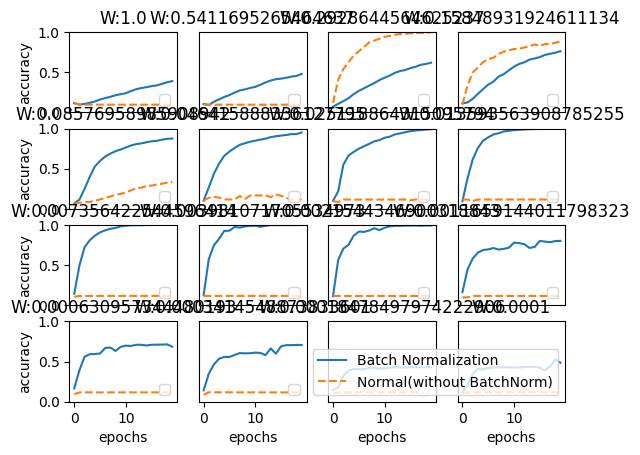

In [5]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()